In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import numpy as np

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('train.csv')

X = df.drop('depvar', axis=1)
y = df['depvar']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

submit = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')


asdf

/usr/local/lib/python3.8/dist-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
length = int(len(X)/5)

X_train1 = X[ : length]
X_train2 = X[length : length * 2]
X_train3 = X[length * 2 : length * 3]
X_train4 = X[length * 3 : length * 4]
X_train5 = X[length * 4 :]

y_train1 = y[ : length]
y_train2 = y[length : length * 2]
y_train3 = y[length * 2 : length * 3]
y_train4 = y[length * 3 : length * 4]
y_train5 = y[length * 4 :]


frames = [X_train1, X_train2, X_train3, X_train4] # 5
X_train_dataset1 = pd.concat(frames)

frames = [X_train1, X_train2, X_train3, X_train5] # 4
X_train_dataset2 = pd.concat(frames)

frames = [X_train1, X_train2, X_train4, X_train5] # 3
X_train_dataset3 = pd.concat(frames)

frames = [X_train1, X_train3, X_train4, X_train5] # 2
X_train_dataset4 = pd.concat(frames)

frames = [X_train2, X_train3, X_train4, X_train5] # 1
X_train_dataset5 = pd.concat(frames)


frames = [y_train1, y_train2, y_train3, y_train4] # 5
y_train_dataset1 = pd.concat(frames)

frames = [y_train1, y_train2, y_train3, y_train5] # 4
y_train_dataset2 = pd.concat(frames)

frames = [y_train1, y_train2, y_train4, y_train5] # 3
y_train_dataset3 = pd.concat(frames)

frames = [y_train1, y_train3, y_train4, y_train5] # 2
y_train_dataset4 = pd.concat(frames)

frames = [y_train2, y_train3, y_train4, y_train5] # 1
y_train_dataset5 = pd.concat(frames)

In [3]:
def calc_sum_f1_and_accuracy(y_actual, y_pred):
    return (accuracy_score(y_actual, y_pred) + f1_score(y_actual, y_pred)) / 2

In [4]:
def calc_score_model(model, name, X_train, y_train, X_val, y_val):
    model1 = model
    model1.fit(X_train, y_train)

    y_pred1 = model1.predict(X_val)
    y_prob1 = model1.predict_proba(X_val)

    thr_result = 0.5
    max_val = 0.0

    scale = 1000
    
    for thr in range(1, scale):
        val = calc_sum_f1_and_accuracy(y_val, (y_prob1[:,1] >= thr / scale))
        if val > max_val:
            thr_result = thr / scale
            max_val = val
    
    return [name, thr_result, max_val, model]

print(calc_score_model(XGBClassifier(), 'XGB', X_train_dataset1, y_train_dataset1, X_train5, y_train5))

[08:05:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGB', 0.388, 0.6824130328867235, XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)]


In [40]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier

from sklearn.linear_model import LogisticRegression

calc_score_model(LogisticRegression(), 'sgd', X_train_dataset1, y_train_dataset1, X_train5, y_train5)

['sgd', 0.338, 0.5191538316751815, LogisticRegression()]

In [32]:
set1_dict = {}
        
# name, thr, val, model = calc_score_model(XGBClassifier(), 'XGB', X_train_dataset1, y_train_dataset1, X_train5, y_train5)
# set1_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(CatBoostClassifier(), 'Cat', X_train_dataset1, y_train_dataset1, X_train5, y_train5)
set1_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(LGBMClassifier(), 'LGBM', X_train_dataset1, y_train_dataset1, X_train5, y_train5)
set1_dict[name] = [val, thr, model]


name, thr, val, model = calc_score_model(RandomForestClassifier(), 'rnd', X_train_dataset1, y_train_dataset1, X_train5, y_train5)
set1_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(DecisionTreeClassifier(), 'Decision', X_train_dataset1, y_train_dataset1, X_train5, y_train5)
set1_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(GradientBoostingClassifier(), 'Gradient', X_train_dataset1, y_train_dataset1, X_train5, y_train5)
set1_dict[name] = [val, thr, model]


# name, thr, val, model = calc_score_model(HistGradientBoostingClassifier(), 'Hist', X_train_dataset1, y_train_dataset1, X_train5, y_train5)
# set1_dict[name] = [val, thr, model]

# name, thr, val, model = calc_score_model(BaggingClassifier(), 'Bag', X_train_dataset1, y_train_dataset1, X_train5, y_train5)
# set1_dict[name] = [val, thr, model]





set2_dict = {}
        
# name, thr, val, model = calc_score_model(XGBClassifier(), 'XGB', X_train_dataset2, y_train_dataset2, X_train4, y_train4)
# set2_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(CatBoostClassifier(), 'Cat', X_train_dataset2, y_train_dataset2, X_train4, y_train4)
set2_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(LGBMClassifier(), 'LGBM', X_train_dataset2, y_train_dataset2, X_train4, y_train4)
set2_dict[name] = [val, thr, model]


name, thr, val, model = calc_score_model(RandomForestClassifier(), 'rnd', X_train_dataset2, y_train_dataset2, X_train4, y_train4)
set2_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(DecisionTreeClassifier(), 'Decision', X_train_dataset2, y_train_dataset2, X_train4, y_train4)
set2_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(GradientBoostingClassifier(), 'Gradient', X_train_dataset2, y_train_dataset2, X_train4, y_train4)
set2_dict[name] = [val, thr, model]


# name, thr, val, model = calc_score_model(HistGradientBoostingClassifier(), 'Hist', X_train_dataset2, y_train_dataset2, X_train4, y_train4)
# set2_dict[name] = [val, thr, model]

# name, thr, val, model = calc_score_model(BaggingClassifier(), 'Bag', X_train_dataset2, y_train_dataset2, X_train4, y_train4)
# set2_dict[name] = [val, thr, model]



set3_dict = {}
        
# name, thr, val, model = calc_score_model(XGBClassifier(), 'XGB', X_train_dataset3, y_train_dataset3, X_train3, y_train3)
# set3_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(CatBoostClassifier(), 'Cat', X_train_dataset3, y_train_dataset3, X_train3, y_train3)
set3_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(LGBMClassifier(), 'LGBM', X_train_dataset3, y_train_dataset3, X_train3, y_train3)
set3_dict[name] = [val, thr, model]


name, thr, val, model = calc_score_model(RandomForestClassifier(), 'rnd', X_train_dataset3, y_train_dataset3, X_train3, y_train3)
set3_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(DecisionTreeClassifier(), 'Decision', X_train_dataset3, y_train_dataset3, X_train3, y_train3)
set3_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(GradientBoostingClassifier(), 'Gradient', X_train_dataset3, y_train_dataset3, X_train3, y_train3)
set3_dict[name] = [val, thr, model]


# name, thr, val, model = calc_score_model(HistGradientBoostingClassifier(), 'Hist',  X_train_dataset3, y_train_dataset3, X_train3, y_train3)
# set3_dict[name] = [val, thr, model]

# name, thr, val, model = calc_score_model(BaggingClassifier(), 'Bag',  X_train_dataset3, y_train_dataset3, X_train3, y_train3)
# set3_dict[name] = [val, thr, model]




set4_dict = {}
        
# name, thr, val, model = calc_score_model(XGBClassifier(), 'XGB', X_train_dataset4, y_train_dataset4, X_train2, y_train2)
# set4_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(CatBoostClassifier(), 'Cat', X_train_dataset4, y_train_dataset4, X_train2, y_train2)
set4_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(LGBMClassifier(), 'LGBM', X_train_dataset4, y_train_dataset4, X_train2, y_train2)
set4_dict[name] = [val, thr, model]


name, thr, val, model = calc_score_model(RandomForestClassifier(), 'rnd', X_train_dataset4, y_train_dataset4, X_train2, y_train2)
set4_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(DecisionTreeClassifier(), 'Decision', X_train_dataset4, y_train_dataset4, X_train2, y_train2)
set4_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(GradientBoostingClassifier(), 'Gradient', X_train_dataset4, y_train_dataset4, X_train2, y_train2)
set4_dict[name] = [val, thr, model]


# name, thr, val, model = calc_score_model(HistGradientBoostingClassifier(), 'Hist',  X_train_dataset4, y_train_dataset4, X_train2, y_train2)
# set4_dict[name] = [val, thr, model]

# name, thr, val, model = calc_score_model(BaggingClassifier(), 'Bag',  X_train_dataset4, y_train_dataset4, X_train2, y_train2)
# set4_dict[name] = [val, thr, model]



set5_dict = {}
        
# name, thr, val, model = calc_score_model(XGBClassifier(), 'XGB', X_train_dataset5, y_train_dataset5, X_train1, y_train1)
# set5_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(CatBoostClassifier(), 'Cat', X_train_dataset5, y_train_dataset5, X_train1, y_train1)
set5_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(LGBMClassifier(), 'LGBM', X_train_dataset5, y_train_dataset5, X_train1, y_train1)
set5_dict[name] = [val, thr, model]


name, thr, val, model = calc_score_model(RandomForestClassifier(), 'rnd', X_train_dataset5, y_train_dataset5, X_train1, y_train1)
set5_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(DecisionTreeClassifier(), 'Decision', X_train_dataset5, y_train_dataset5, X_train1, y_train1)
set5_dict[name] = [val, thr, model]

name, thr, val, model = calc_score_model(GradientBoostingClassifier(), 'Gradient', X_train_dataset5, y_train_dataset5, X_train1, y_train1)
set5_dict[name] = [val, thr, model]


# name, thr, val, model = calc_score_model(HistGradientBoostingClassifier(), 'Hist',  X_train_dataset5, y_train_dataset5, X_train1, y_train1)
# set5_dict[name] = [val, thr, model]

# name, thr, val, model = calc_score_model(BaggingClassifier(), 'Bag',  X_train_dataset5, y_train_dataset5, X_train1, y_train1)
# set5_dict[name] = [val, thr, model]

[08:44:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.06692
0:	learn: 0.6759213	total: 8.43ms	remaining: 8.42s
1:	learn: 0.6610873	total: 16.7ms	remaining: 8.35s
2:	learn: 0.6486342	total: 25.7ms	remaining: 8.53s
3:	learn: 0.6368105	total: 35.4ms	remaining: 8.82s
4:	learn: 0.6277007	total: 41.5ms	remaining: 8.25s
5:	learn: 0.6184385	total: 50.8ms	remaining: 8.42s
6:	learn: 0.6111358	total: 58.7ms	remaining: 8.32s
7:	learn: 0.6041235	total: 68.4ms	remaining: 8.48s
8:	learn: 0.5984077	total: 76.8ms	remaining: 8.46s
9:	learn: 0.5936231	total: 86.5ms	remaining: 8.56s
10:	learn: 0.5890185	total: 95ms	remaining: 8.54s
11:	learn: 0.5846857	total: 104ms	remaining: 8.55s
12:	learn: 0.5809293	total: 114ms	remaining: 8.62s
13:	learn: 0.5777720	total: 122ms	remaining: 8.58s
14:	le

166:	learn: 0.5074765	total: 1.61s	remaining: 8.04s
167:	learn: 0.5072734	total: 1.62s	remaining: 8.03s
168:	learn: 0.5071416	total: 1.63s	remaining: 8.03s
169:	learn: 0.5070305	total: 1.64s	remaining: 8.01s
170:	learn: 0.5068054	total: 1.65s	remaining: 8s
171:	learn: 0.5066326	total: 1.66s	remaining: 7.98s
172:	learn: 0.5065504	total: 1.67s	remaining: 7.97s
173:	learn: 0.5064088	total: 1.67s	remaining: 7.95s
174:	learn: 0.5062982	total: 1.68s	remaining: 7.94s
175:	learn: 0.5061065	total: 1.69s	remaining: 7.93s
176:	learn: 0.5059269	total: 1.7s	remaining: 7.91s
177:	learn: 0.5057183	total: 1.71s	remaining: 7.9s
178:	learn: 0.5055621	total: 1.72s	remaining: 7.89s
179:	learn: 0.5053374	total: 1.73s	remaining: 7.87s
180:	learn: 0.5051654	total: 1.74s	remaining: 7.86s
181:	learn: 0.5050477	total: 1.75s	remaining: 7.85s
182:	learn: 0.5049415	total: 1.75s	remaining: 7.84s
183:	learn: 0.5048340	total: 1.76s	remaining: 7.83s
184:	learn: 0.5046317	total: 1.77s	remaining: 7.82s
185:	learn: 0.504

346:	learn: 0.4853097	total: 3.23s	remaining: 6.07s
347:	learn: 0.4851926	total: 3.24s	remaining: 6.07s
348:	learn: 0.4851167	total: 3.25s	remaining: 6.07s
349:	learn: 0.4849886	total: 3.26s	remaining: 6.06s
350:	learn: 0.4849165	total: 3.27s	remaining: 6.04s
351:	learn: 0.4848326	total: 3.28s	remaining: 6.04s
352:	learn: 0.4847124	total: 3.29s	remaining: 6.03s
353:	learn: 0.4846487	total: 3.3s	remaining: 6.02s
354:	learn: 0.4845770	total: 3.31s	remaining: 6.01s
355:	learn: 0.4844865	total: 3.31s	remaining: 6s
356:	learn: 0.4844013	total: 3.32s	remaining: 5.98s
357:	learn: 0.4843329	total: 3.33s	remaining: 5.97s
358:	learn: 0.4842435	total: 3.34s	remaining: 5.96s
359:	learn: 0.4841393	total: 3.35s	remaining: 5.95s
360:	learn: 0.4840133	total: 3.36s	remaining: 5.94s
361:	learn: 0.4838928	total: 3.37s	remaining: 5.93s
362:	learn: 0.4838256	total: 3.37s	remaining: 5.92s
363:	learn: 0.4837343	total: 3.38s	remaining: 5.91s
364:	learn: 0.4836496	total: 3.39s	remaining: 5.9s
365:	learn: 0.483

521:	learn: 0.4717713	total: 4.84s	remaining: 4.43s
522:	learn: 0.4716778	total: 4.85s	remaining: 4.43s
523:	learn: 0.4715783	total: 4.86s	remaining: 4.42s
524:	learn: 0.4715186	total: 4.87s	remaining: 4.41s
525:	learn: 0.4714570	total: 4.88s	remaining: 4.4s
526:	learn: 0.4713498	total: 4.89s	remaining: 4.39s
527:	learn: 0.4712859	total: 4.9s	remaining: 4.38s
528:	learn: 0.4712176	total: 4.91s	remaining: 4.37s
529:	learn: 0.4711578	total: 4.92s	remaining: 4.36s
530:	learn: 0.4710977	total: 4.92s	remaining: 4.35s
531:	learn: 0.4710222	total: 4.93s	remaining: 4.34s
532:	learn: 0.4709422	total: 4.94s	remaining: 4.33s
533:	learn: 0.4708125	total: 4.95s	remaining: 4.32s
534:	learn: 0.4707279	total: 4.96s	remaining: 4.31s
535:	learn: 0.4706433	total: 4.97s	remaining: 4.3s
536:	learn: 0.4705345	total: 4.98s	remaining: 4.29s
537:	learn: 0.4704745	total: 4.99s	remaining: 4.28s
538:	learn: 0.4704172	total: 5s	remaining: 4.27s
539:	learn: 0.4703351	total: 5s	remaining: 4.26s
540:	learn: 0.4702918

696:	learn: 0.4601853	total: 6.45s	remaining: 2.8s
697:	learn: 0.4601029	total: 6.46s	remaining: 2.79s
698:	learn: 0.4600406	total: 6.47s	remaining: 2.79s
699:	learn: 0.4599700	total: 6.48s	remaining: 2.78s
700:	learn: 0.4598922	total: 6.49s	remaining: 2.77s
701:	learn: 0.4598182	total: 6.5s	remaining: 2.76s
702:	learn: 0.4597856	total: 6.51s	remaining: 2.75s
703:	learn: 0.4597152	total: 6.52s	remaining: 2.74s
704:	learn: 0.4596532	total: 6.53s	remaining: 2.73s
705:	learn: 0.4595993	total: 6.54s	remaining: 2.72s
706:	learn: 0.4595176	total: 6.55s	remaining: 2.72s
707:	learn: 0.4594380	total: 6.57s	remaining: 2.71s
708:	learn: 0.4593989	total: 6.57s	remaining: 2.7s
709:	learn: 0.4593127	total: 6.58s	remaining: 2.69s
710:	learn: 0.4592693	total: 6.59s	remaining: 2.68s
711:	learn: 0.4592242	total: 6.61s	remaining: 2.67s
712:	learn: 0.4591625	total: 6.62s	remaining: 2.66s
713:	learn: 0.4591033	total: 6.63s	remaining: 2.65s
714:	learn: 0.4590806	total: 6.64s	remaining: 2.65s
715:	learn: 0.4

856:	learn: 0.4508596	total: 8.06s	remaining: 1.34s
857:	learn: 0.4508099	total: 8.07s	remaining: 1.33s
858:	learn: 0.4507611	total: 8.08s	remaining: 1.32s
859:	learn: 0.4506631	total: 8.09s	remaining: 1.32s
860:	learn: 0.4506032	total: 8.1s	remaining: 1.31s
861:	learn: 0.4505555	total: 8.11s	remaining: 1.3s
862:	learn: 0.4505032	total: 8.12s	remaining: 1.29s
863:	learn: 0.4504209	total: 8.13s	remaining: 1.28s
864:	learn: 0.4503919	total: 8.13s	remaining: 1.27s
865:	learn: 0.4503393	total: 8.15s	remaining: 1.26s
866:	learn: 0.4502575	total: 8.16s	remaining: 1.25s
867:	learn: 0.4501981	total: 8.16s	remaining: 1.24s
868:	learn: 0.4501516	total: 8.18s	remaining: 1.23s
869:	learn: 0.4501121	total: 8.18s	remaining: 1.22s
870:	learn: 0.4500436	total: 8.19s	remaining: 1.21s
871:	learn: 0.4499884	total: 8.2s	remaining: 1.2s
872:	learn: 0.4499378	total: 8.21s	remaining: 1.19s
873:	learn: 0.4499000	total: 8.22s	remaining: 1.19s
874:	learn: 0.4498213	total: 8.23s	remaining: 1.18s
875:	learn: 0.44

16:	learn: 0.5666003	total: 201ms	remaining: 11.6s
17:	learn: 0.5647241	total: 212ms	remaining: 11.6s
18:	learn: 0.5627896	total: 223ms	remaining: 11.5s
19:	learn: 0.5606510	total: 231ms	remaining: 11.3s
20:	learn: 0.5587632	total: 242ms	remaining: 11.3s
21:	learn: 0.5574964	total: 251ms	remaining: 11.2s
22:	learn: 0.5558026	total: 265ms	remaining: 11.2s
23:	learn: 0.5542931	total: 278ms	remaining: 11.3s
24:	learn: 0.5530168	total: 288ms	remaining: 11.2s
25:	learn: 0.5519062	total: 297ms	remaining: 11.1s
26:	learn: 0.5508554	total: 307ms	remaining: 11.1s
27:	learn: 0.5495129	total: 316ms	remaining: 11s
28:	learn: 0.5485355	total: 330ms	remaining: 11.1s
29:	learn: 0.5475936	total: 342ms	remaining: 11.1s
30:	learn: 0.5468406	total: 352ms	remaining: 11s
31:	learn: 0.5458955	total: 362ms	remaining: 10.9s
32:	learn: 0.5448863	total: 373ms	remaining: 10.9s
33:	learn: 0.5440491	total: 389ms	remaining: 11s
34:	learn: 0.5433727	total: 397ms	remaining: 10.9s
35:	learn: 0.5425210	total: 407ms	rem

177:	learn: 0.5030619	total: 1.82s	remaining: 8.42s
178:	learn: 0.5028830	total: 1.83s	remaining: 8.42s
179:	learn: 0.5026945	total: 1.84s	remaining: 8.39s
180:	learn: 0.5025765	total: 1.85s	remaining: 8.4s
181:	learn: 0.5023477	total: 1.87s	remaining: 8.39s
182:	learn: 0.5021316	total: 1.88s	remaining: 8.38s
183:	learn: 0.5018471	total: 1.89s	remaining: 8.38s
184:	learn: 0.5017317	total: 1.9s	remaining: 8.36s
185:	learn: 0.5015749	total: 1.91s	remaining: 8.34s
186:	learn: 0.5014131	total: 1.92s	remaining: 8.33s
187:	learn: 0.5012254	total: 1.92s	remaining: 8.31s
188:	learn: 0.5009810	total: 1.94s	remaining: 8.3s
189:	learn: 0.5008646	total: 1.94s	remaining: 8.29s
190:	learn: 0.5006707	total: 1.95s	remaining: 8.27s
191:	learn: 0.5004628	total: 1.96s	remaining: 8.26s
192:	learn: 0.5002441	total: 1.97s	remaining: 8.24s
193:	learn: 0.5001385	total: 1.98s	remaining: 8.22s
194:	learn: 0.5000248	total: 1.99s	remaining: 8.21s
195:	learn: 0.4998426	total: 2s	remaining: 8.2s
196:	learn: 0.49967

340:	learn: 0.4830896	total: 3.45s	remaining: 6.67s
341:	learn: 0.4830172	total: 3.46s	remaining: 6.66s
342:	learn: 0.4829315	total: 3.47s	remaining: 6.65s
343:	learn: 0.4828351	total: 3.48s	remaining: 6.64s
344:	learn: 0.4827677	total: 3.49s	remaining: 6.63s
345:	learn: 0.4826875	total: 3.5s	remaining: 6.62s
346:	learn: 0.4825464	total: 3.51s	remaining: 6.6s
347:	learn: 0.4824814	total: 3.52s	remaining: 6.59s
348:	learn: 0.4824117	total: 3.53s	remaining: 6.58s
349:	learn: 0.4823339	total: 3.54s	remaining: 6.57s
350:	learn: 0.4822006	total: 3.54s	remaining: 6.56s
351:	learn: 0.4821015	total: 3.55s	remaining: 6.54s
352:	learn: 0.4820212	total: 3.56s	remaining: 6.54s
353:	learn: 0.4819363	total: 3.57s	remaining: 6.52s
354:	learn: 0.4818389	total: 3.58s	remaining: 6.51s
355:	learn: 0.4817040	total: 3.6s	remaining: 6.5s
356:	learn: 0.4816016	total: 3.6s	remaining: 6.49s
357:	learn: 0.4815132	total: 3.61s	remaining: 6.48s
358:	learn: 0.4814463	total: 3.62s	remaining: 6.47s
359:	learn: 0.481

511:	learn: 0.4694349	total: 5.05s	remaining: 4.82s
512:	learn: 0.4693779	total: 5.06s	remaining: 4.81s
513:	learn: 0.4693166	total: 5.07s	remaining: 4.8s
514:	learn: 0.4692811	total: 5.08s	remaining: 4.79s
515:	learn: 0.4691614	total: 5.09s	remaining: 4.78s
516:	learn: 0.4691080	total: 5.1s	remaining: 4.76s
517:	learn: 0.4690339	total: 5.11s	remaining: 4.75s
518:	learn: 0.4689638	total: 5.12s	remaining: 4.74s
519:	learn: 0.4688922	total: 5.13s	remaining: 4.73s
520:	learn: 0.4688229	total: 5.13s	remaining: 4.72s
521:	learn: 0.4687556	total: 5.14s	remaining: 4.71s
522:	learn: 0.4686634	total: 5.15s	remaining: 4.7s
523:	learn: 0.4685669	total: 5.16s	remaining: 4.69s
524:	learn: 0.4684949	total: 5.17s	remaining: 4.68s
525:	learn: 0.4684473	total: 5.18s	remaining: 4.67s
526:	learn: 0.4683645	total: 5.19s	remaining: 4.66s
527:	learn: 0.4682957	total: 5.2s	remaining: 4.64s
528:	learn: 0.4682243	total: 5.21s	remaining: 4.63s
529:	learn: 0.4681385	total: 5.21s	remaining: 4.62s
530:	learn: 0.46

682:	learn: 0.4578661	total: 6.69s	remaining: 3.1s
683:	learn: 0.4578040	total: 6.7s	remaining: 3.09s
684:	learn: 0.4577460	total: 6.71s	remaining: 3.08s
685:	learn: 0.4576901	total: 6.72s	remaining: 3.07s
686:	learn: 0.4576360	total: 6.73s	remaining: 3.06s
687:	learn: 0.4575852	total: 6.74s	remaining: 3.06s
688:	learn: 0.4575251	total: 6.75s	remaining: 3.04s
689:	learn: 0.4574552	total: 6.75s	remaining: 3.04s
690:	learn: 0.4573917	total: 6.76s	remaining: 3.02s
691:	learn: 0.4573503	total: 6.77s	remaining: 3.01s
692:	learn: 0.4572920	total: 6.78s	remaining: 3s
693:	learn: 0.4572387	total: 6.79s	remaining: 2.99s
694:	learn: 0.4572270	total: 6.8s	remaining: 2.98s
695:	learn: 0.4571830	total: 6.81s	remaining: 2.97s
696:	learn: 0.4571519	total: 6.82s	remaining: 2.96s
697:	learn: 0.4570754	total: 6.83s	remaining: 2.95s
698:	learn: 0.4570077	total: 6.84s	remaining: 2.94s
699:	learn: 0.4569603	total: 6.85s	remaining: 2.93s
700:	learn: 0.4569129	total: 6.86s	remaining: 2.92s
701:	learn: 0.4568

859:	learn: 0.4476004	total: 8.3s	remaining: 1.35s
860:	learn: 0.4475557	total: 8.31s	remaining: 1.34s
861:	learn: 0.4475171	total: 8.32s	remaining: 1.33s
862:	learn: 0.4474681	total: 8.33s	remaining: 1.32s
863:	learn: 0.4473976	total: 8.34s	remaining: 1.31s
864:	learn: 0.4473509	total: 8.35s	remaining: 1.3s
865:	learn: 0.4472974	total: 8.36s	remaining: 1.29s
866:	learn: 0.4472409	total: 8.37s	remaining: 1.28s
867:	learn: 0.4471761	total: 8.38s	remaining: 1.27s
868:	learn: 0.4471427	total: 8.38s	remaining: 1.26s
869:	learn: 0.4470815	total: 8.39s	remaining: 1.25s
870:	learn: 0.4470216	total: 8.4s	remaining: 1.24s
871:	learn: 0.4469746	total: 8.41s	remaining: 1.23s
872:	learn: 0.4469366	total: 8.42s	remaining: 1.22s
873:	learn: 0.4468863	total: 8.43s	remaining: 1.21s
874:	learn: 0.4468496	total: 8.43s	remaining: 1.2s
875:	learn: 0.4468435	total: 8.44s	remaining: 1.19s
876:	learn: 0.4467821	total: 8.45s	remaining: 1.19s
877:	learn: 0.4467142	total: 8.46s	remaining: 1.18s
878:	learn: 0.44

18:	learn: 0.5635455	total: 192ms	remaining: 9.91s
19:	learn: 0.5613416	total: 202ms	remaining: 9.9s
20:	learn: 0.5595574	total: 213ms	remaining: 9.93s
21:	learn: 0.5582867	total: 221ms	remaining: 9.84s
22:	learn: 0.5568059	total: 231ms	remaining: 9.82s
23:	learn: 0.5553466	total: 241ms	remaining: 9.79s
24:	learn: 0.5540456	total: 252ms	remaining: 9.84s
25:	learn: 0.5525443	total: 263ms	remaining: 9.84s
26:	learn: 0.5513105	total: 272ms	remaining: 9.8s
27:	learn: 0.5501633	total: 283ms	remaining: 9.82s
28:	learn: 0.5489069	total: 292ms	remaining: 9.77s
29:	learn: 0.5477435	total: 301ms	remaining: 9.73s
30:	learn: 0.5466762	total: 312ms	remaining: 9.76s
31:	learn: 0.5456524	total: 322ms	remaining: 9.73s
32:	learn: 0.5446251	total: 334ms	remaining: 9.77s
33:	learn: 0.5438900	total: 343ms	remaining: 9.74s
34:	learn: 0.5432226	total: 352ms	remaining: 9.7s
35:	learn: 0.5425609	total: 363ms	remaining: 9.72s
36:	learn: 0.5419523	total: 371ms	remaining: 9.65s
37:	learn: 0.5414721	total: 381ms	

182:	learn: 0.5025302	total: 1.82s	remaining: 8.11s
183:	learn: 0.5023646	total: 1.82s	remaining: 8.09s
184:	learn: 0.5022399	total: 1.83s	remaining: 8.08s
185:	learn: 0.5020774	total: 1.84s	remaining: 8.07s
186:	learn: 0.5018541	total: 1.85s	remaining: 8.05s
187:	learn: 0.5016794	total: 1.87s	remaining: 8.06s
188:	learn: 0.5015144	total: 1.88s	remaining: 8.06s
189:	learn: 0.5013931	total: 1.89s	remaining: 8.05s
190:	learn: 0.5012489	total: 1.9s	remaining: 8.05s
191:	learn: 0.5011022	total: 1.91s	remaining: 8.05s
192:	learn: 0.5009122	total: 1.92s	remaining: 8.04s
193:	learn: 0.5007739	total: 1.93s	remaining: 8.04s
194:	learn: 0.5005750	total: 1.95s	remaining: 8.03s
195:	learn: 0.5004040	total: 1.96s	remaining: 8.02s
196:	learn: 0.5002480	total: 1.97s	remaining: 8.01s
197:	learn: 0.5000829	total: 1.98s	remaining: 8s
198:	learn: 0.4998992	total: 1.99s	remaining: 7.99s
199:	learn: 0.4998013	total: 2s	remaining: 7.98s
200:	learn: 0.4997138	total: 2s	remaining: 7.97s
201:	learn: 0.4996253	

355:	learn: 0.4823795	total: 3.42s	remaining: 6.19s
356:	learn: 0.4822857	total: 3.43s	remaining: 6.18s
357:	learn: 0.4822120	total: 3.44s	remaining: 6.17s
358:	learn: 0.4820647	total: 3.45s	remaining: 6.16s
359:	learn: 0.4819727	total: 3.46s	remaining: 6.15s
360:	learn: 0.4818745	total: 3.47s	remaining: 6.14s
361:	learn: 0.4817503	total: 3.48s	remaining: 6.13s
362:	learn: 0.4816486	total: 3.49s	remaining: 6.12s
363:	learn: 0.4815413	total: 3.5s	remaining: 6.11s
364:	learn: 0.4814814	total: 3.5s	remaining: 6.1s
365:	learn: 0.4813485	total: 3.52s	remaining: 6.09s
366:	learn: 0.4812586	total: 3.52s	remaining: 6.08s
367:	learn: 0.4811572	total: 3.53s	remaining: 6.07s
368:	learn: 0.4810724	total: 3.54s	remaining: 6.06s
369:	learn: 0.4809952	total: 3.55s	remaining: 6.04s
370:	learn: 0.4809202	total: 3.56s	remaining: 6.03s
371:	learn: 0.4808224	total: 3.57s	remaining: 6.02s
372:	learn: 0.4807339	total: 3.58s	remaining: 6.01s
373:	learn: 0.4806572	total: 3.59s	remaining: 6s
374:	learn: 0.4805

522:	learn: 0.4693265	total: 5.03s	remaining: 4.59s
523:	learn: 0.4692452	total: 5.04s	remaining: 4.58s
524:	learn: 0.4691563	total: 5.05s	remaining: 4.57s
525:	learn: 0.4691012	total: 5.06s	remaining: 4.56s
526:	learn: 0.4690420	total: 5.07s	remaining: 4.55s
527:	learn: 0.4689935	total: 5.08s	remaining: 4.54s
528:	learn: 0.4688972	total: 5.08s	remaining: 4.53s
529:	learn: 0.4688906	total: 5.09s	remaining: 4.52s
530:	learn: 0.4688382	total: 5.1s	remaining: 4.5s
531:	learn: 0.4687400	total: 5.11s	remaining: 4.49s
532:	learn: 0.4686407	total: 5.12s	remaining: 4.49s
533:	learn: 0.4685594	total: 5.13s	remaining: 4.48s
534:	learn: 0.4684999	total: 5.14s	remaining: 4.46s
535:	learn: 0.4684221	total: 5.15s	remaining: 4.46s
536:	learn: 0.4683303	total: 5.16s	remaining: 4.44s
537:	learn: 0.4682761	total: 5.16s	remaining: 4.43s
538:	learn: 0.4682295	total: 5.17s	remaining: 4.42s
539:	learn: 0.4681211	total: 5.18s	remaining: 4.41s
540:	learn: 0.4680538	total: 5.19s	remaining: 4.4s
541:	learn: 0.4

698:	learn: 0.4579417	total: 6.64s	remaining: 2.86s
699:	learn: 0.4578748	total: 6.65s	remaining: 2.85s
700:	learn: 0.4578202	total: 6.66s	remaining: 2.84s
701:	learn: 0.4577556	total: 6.67s	remaining: 2.83s
702:	learn: 0.4576848	total: 6.68s	remaining: 2.82s
703:	learn: 0.4576492	total: 6.69s	remaining: 2.81s
704:	learn: 0.4575783	total: 6.7s	remaining: 2.8s
705:	learn: 0.4575335	total: 6.7s	remaining: 2.79s
706:	learn: 0.4574510	total: 6.71s	remaining: 2.78s
707:	learn: 0.4573947	total: 6.72s	remaining: 2.77s
708:	learn: 0.4573319	total: 6.73s	remaining: 2.76s
709:	learn: 0.4572616	total: 6.74s	remaining: 2.75s
710:	learn: 0.4572066	total: 6.75s	remaining: 2.74s
711:	learn: 0.4571450	total: 6.76s	remaining: 2.73s
712:	learn: 0.4570456	total: 6.76s	remaining: 2.72s
713:	learn: 0.4570057	total: 6.77s	remaining: 2.71s
714:	learn: 0.4569555	total: 6.78s	remaining: 2.7s
715:	learn: 0.4568692	total: 6.79s	remaining: 2.69s
716:	learn: 0.4568129	total: 6.8s	remaining: 2.68s
717:	learn: 0.456

873:	learn: 0.4476376	total: 8.26s	remaining: 1.19s
874:	learn: 0.4475875	total: 8.27s	remaining: 1.18s
875:	learn: 0.4475484	total: 8.28s	remaining: 1.17s
876:	learn: 0.4474961	total: 8.29s	remaining: 1.16s
877:	learn: 0.4474609	total: 8.3s	remaining: 1.15s
878:	learn: 0.4474126	total: 8.31s	remaining: 1.14s
879:	learn: 0.4473696	total: 8.32s	remaining: 1.13s
880:	learn: 0.4472966	total: 8.33s	remaining: 1.12s
881:	learn: 0.4472519	total: 8.33s	remaining: 1.11s
882:	learn: 0.4472136	total: 8.34s	remaining: 1.1s
883:	learn: 0.4471607	total: 8.35s	remaining: 1.1s
884:	learn: 0.4471096	total: 8.36s	remaining: 1.09s
885:	learn: 0.4470496	total: 8.37s	remaining: 1.08s
886:	learn: 0.4469835	total: 8.38s	remaining: 1.07s
887:	learn: 0.4469026	total: 8.39s	remaining: 1.06s
888:	learn: 0.4468470	total: 8.4s	remaining: 1.05s
889:	learn: 0.4467882	total: 8.4s	remaining: 1.04s
890:	learn: 0.4467513	total: 8.41s	remaining: 1.03s
891:	learn: 0.4467078	total: 8.42s	remaining: 1.02s
892:	learn: 0.446

27:	learn: 0.5521650	total: 405ms	remaining: 14.1s
28:	learn: 0.5509690	total: 417ms	remaining: 14s
29:	learn: 0.5498462	total: 427ms	remaining: 13.8s
30:	learn: 0.5490962	total: 437ms	remaining: 13.7s
31:	learn: 0.5478445	total: 447ms	remaining: 13.5s
32:	learn: 0.5468338	total: 456ms	remaining: 13.4s
33:	learn: 0.5456908	total: 469ms	remaining: 13.3s
34:	learn: 0.5451603	total: 478ms	remaining: 13.2s
35:	learn: 0.5441054	total: 489ms	remaining: 13.1s
36:	learn: 0.5433304	total: 500ms	remaining: 13s
37:	learn: 0.5426109	total: 510ms	remaining: 12.9s
38:	learn: 0.5419435	total: 520ms	remaining: 12.8s
39:	learn: 0.5412129	total: 531ms	remaining: 12.7s
40:	learn: 0.5406456	total: 541ms	remaining: 12.6s
41:	learn: 0.5400093	total: 556ms	remaining: 12.7s
42:	learn: 0.5395784	total: 568ms	remaining: 12.6s
43:	learn: 0.5388665	total: 577ms	remaining: 12.5s
44:	learn: 0.5383415	total: 586ms	remaining: 12.4s
45:	learn: 0.5378397	total: 596ms	remaining: 12.4s
46:	learn: 0.5374413	total: 607ms	r

206:	learn: 0.4997837	total: 2.25s	remaining: 8.61s
207:	learn: 0.4996650	total: 2.26s	remaining: 8.61s
208:	learn: 0.4995257	total: 2.27s	remaining: 8.6s
209:	learn: 0.4993395	total: 2.29s	remaining: 8.62s
210:	learn: 0.4991526	total: 2.3s	remaining: 8.61s
211:	learn: 0.4990197	total: 2.31s	remaining: 8.6s
212:	learn: 0.4989362	total: 2.33s	remaining: 8.6s
213:	learn: 0.4987591	total: 2.34s	remaining: 8.59s
214:	learn: 0.4986426	total: 2.35s	remaining: 8.57s
215:	learn: 0.4984420	total: 2.36s	remaining: 8.56s
216:	learn: 0.4983427	total: 2.37s	remaining: 8.53s
217:	learn: 0.4981161	total: 2.38s	remaining: 8.53s
218:	learn: 0.4979913	total: 2.38s	remaining: 8.51s
219:	learn: 0.4978219	total: 2.4s	remaining: 8.49s
220:	learn: 0.4977355	total: 2.4s	remaining: 8.48s
221:	learn: 0.4975633	total: 2.41s	remaining: 8.46s
222:	learn: 0.4974532	total: 2.42s	remaining: 8.44s
223:	learn: 0.4972874	total: 2.43s	remaining: 8.42s
224:	learn: 0.4971860	total: 2.44s	remaining: 8.41s
225:	learn: 0.4970

372:	learn: 0.4827436	total: 3.87s	remaining: 6.51s
373:	learn: 0.4826369	total: 3.89s	remaining: 6.51s
374:	learn: 0.4825584	total: 3.9s	remaining: 6.5s
375:	learn: 0.4824592	total: 3.91s	remaining: 6.49s
376:	learn: 0.4823706	total: 3.92s	remaining: 6.48s
377:	learn: 0.4822471	total: 3.93s	remaining: 6.47s
378:	learn: 0.4821688	total: 3.94s	remaining: 6.46s
379:	learn: 0.4821089	total: 3.95s	remaining: 6.44s
380:	learn: 0.4820240	total: 3.96s	remaining: 6.43s
381:	learn: 0.4819350	total: 3.97s	remaining: 6.42s
382:	learn: 0.4818622	total: 3.98s	remaining: 6.41s
383:	learn: 0.4817840	total: 3.99s	remaining: 6.4s
384:	learn: 0.4816906	total: 4s	remaining: 6.39s
385:	learn: 0.4815922	total: 4.01s	remaining: 6.38s
386:	learn: 0.4814968	total: 4.02s	remaining: 6.37s
387:	learn: 0.4813925	total: 4.03s	remaining: 6.36s
388:	learn: 0.4813250	total: 4.04s	remaining: 6.34s
389:	learn: 0.4812833	total: 4.05s	remaining: 6.33s
390:	learn: 0.4811741	total: 4.05s	remaining: 6.32s
391:	learn: 0.4810

533:	learn: 0.4703967	total: 5.5s	remaining: 4.8s
534:	learn: 0.4703159	total: 5.51s	remaining: 4.79s
535:	learn: 0.4702328	total: 5.52s	remaining: 4.78s
536:	learn: 0.4701656	total: 5.53s	remaining: 4.77s
537:	learn: 0.4701014	total: 5.54s	remaining: 4.76s
538:	learn: 0.4700590	total: 5.55s	remaining: 4.75s
539:	learn: 0.4699807	total: 5.56s	remaining: 4.73s
540:	learn: 0.4699022	total: 5.57s	remaining: 4.72s
541:	learn: 0.4698414	total: 5.58s	remaining: 4.71s
542:	learn: 0.4697778	total: 5.59s	remaining: 4.7s
543:	learn: 0.4697126	total: 5.6s	remaining: 4.69s
544:	learn: 0.4696415	total: 5.61s	remaining: 4.68s
545:	learn: 0.4695717	total: 5.62s	remaining: 4.67s
546:	learn: 0.4695109	total: 5.63s	remaining: 4.66s
547:	learn: 0.4694553	total: 5.64s	remaining: 4.65s
548:	learn: 0.4694013	total: 5.65s	remaining: 4.64s
549:	learn: 0.4693700	total: 5.66s	remaining: 4.63s
550:	learn: 0.4692873	total: 5.67s	remaining: 4.62s
551:	learn: 0.4692520	total: 5.67s	remaining: 4.61s
552:	learn: 0.46

693:	learn: 0.4600599	total: 7.13s	remaining: 3.14s
694:	learn: 0.4599611	total: 7.14s	remaining: 3.13s
695:	learn: 0.4598896	total: 7.15s	remaining: 3.12s
696:	learn: 0.4598332	total: 7.16s	remaining: 3.11s
697:	learn: 0.4597885	total: 7.17s	remaining: 3.1s
698:	learn: 0.4597285	total: 7.18s	remaining: 3.09s
699:	learn: 0.4596659	total: 7.19s	remaining: 3.08s
700:	learn: 0.4596265	total: 7.2s	remaining: 3.07s
701:	learn: 0.4595474	total: 7.2s	remaining: 3.06s
702:	learn: 0.4594773	total: 7.21s	remaining: 3.05s
703:	learn: 0.4594137	total: 7.22s	remaining: 3.04s
704:	learn: 0.4593458	total: 7.23s	remaining: 3.03s
705:	learn: 0.4592836	total: 7.24s	remaining: 3.02s
706:	learn: 0.4592212	total: 7.25s	remaining: 3s
707:	learn: 0.4591721	total: 7.26s	remaining: 2.99s
708:	learn: 0.4591251	total: 7.27s	remaining: 2.98s
709:	learn: 0.4590581	total: 7.28s	remaining: 2.97s
710:	learn: 0.4590442	total: 7.29s	remaining: 2.96s
711:	learn: 0.4589712	total: 7.3s	remaining: 2.95s
712:	learn: 0.45890

867:	learn: 0.4496915	total: 8.95s	remaining: 1.36s
868:	learn: 0.4496129	total: 8.96s	remaining: 1.35s
869:	learn: 0.4495543	total: 8.97s	remaining: 1.34s
870:	learn: 0.4495049	total: 8.99s	remaining: 1.33s
871:	learn: 0.4494659	total: 9s	remaining: 1.32s
872:	learn: 0.4494114	total: 9.01s	remaining: 1.31s
873:	learn: 0.4493684	total: 9.02s	remaining: 1.3s
874:	learn: 0.4493239	total: 9.03s	remaining: 1.29s
875:	learn: 0.4492747	total: 9.04s	remaining: 1.28s
876:	learn: 0.4492281	total: 9.04s	remaining: 1.27s
877:	learn: 0.4491663	total: 9.05s	remaining: 1.26s
878:	learn: 0.4491156	total: 9.06s	remaining: 1.25s
879:	learn: 0.4490845	total: 9.07s	remaining: 1.24s
880:	learn: 0.4490073	total: 9.09s	remaining: 1.23s
881:	learn: 0.4489542	total: 9.09s	remaining: 1.22s
882:	learn: 0.4488946	total: 9.1s	remaining: 1.21s
883:	learn: 0.4488211	total: 9.11s	remaining: 1.2s
884:	learn: 0.4487814	total: 9.12s	remaining: 1.19s
885:	learn: 0.4487054	total: 9.13s	remaining: 1.18s
886:	learn: 0.4486

41:	learn: 0.5393982	total: 396ms	remaining: 9.02s
42:	learn: 0.5386455	total: 406ms	remaining: 9.03s
43:	learn: 0.5382467	total: 416ms	remaining: 9.05s
44:	learn: 0.5376472	total: 426ms	remaining: 9.04s
45:	learn: 0.5370974	total: 437ms	remaining: 9.05s
46:	learn: 0.5365336	total: 445ms	remaining: 9.02s
47:	learn: 0.5361135	total: 455ms	remaining: 9.02s
48:	learn: 0.5354107	total: 465ms	remaining: 9.03s
49:	learn: 0.5349225	total: 475ms	remaining: 9.03s
50:	learn: 0.5343228	total: 486ms	remaining: 9.05s
51:	learn: 0.5338142	total: 497ms	remaining: 9.06s
52:	learn: 0.5333190	total: 506ms	remaining: 9.04s
53:	learn: 0.5328369	total: 517ms	remaining: 9.05s
54:	learn: 0.5323927	total: 525ms	remaining: 9.02s
55:	learn: 0.5321084	total: 535ms	remaining: 9.02s
56:	learn: 0.5318665	total: 543ms	remaining: 8.98s
57:	learn: 0.5314796	total: 552ms	remaining: 8.96s
58:	learn: 0.5308370	total: 562ms	remaining: 8.96s
59:	learn: 0.5305120	total: 570ms	remaining: 8.93s
60:	learn: 0.5300670	total: 581

220:	learn: 0.4973051	total: 2.22s	remaining: 7.82s
221:	learn: 0.4971664	total: 2.23s	remaining: 7.81s
222:	learn: 0.4970287	total: 2.24s	remaining: 7.79s
223:	learn: 0.4969270	total: 2.25s	remaining: 7.78s
224:	learn: 0.4968302	total: 2.25s	remaining: 7.76s
225:	learn: 0.4967597	total: 2.26s	remaining: 7.74s
226:	learn: 0.4966443	total: 2.27s	remaining: 7.74s
227:	learn: 0.4965209	total: 2.28s	remaining: 7.72s
228:	learn: 0.4963906	total: 2.29s	remaining: 7.71s
229:	learn: 0.4962635	total: 2.3s	remaining: 7.7s
230:	learn: 0.4961067	total: 2.31s	remaining: 7.69s
231:	learn: 0.4959367	total: 2.32s	remaining: 7.68s
232:	learn: 0.4957624	total: 2.33s	remaining: 7.67s
233:	learn: 0.4956577	total: 2.34s	remaining: 7.66s
234:	learn: 0.4954774	total: 2.35s	remaining: 7.64s
235:	learn: 0.4953210	total: 2.36s	remaining: 7.63s
236:	learn: 0.4951934	total: 2.37s	remaining: 7.62s
237:	learn: 0.4950902	total: 2.38s	remaining: 7.61s
238:	learn: 0.4949631	total: 2.39s	remaining: 7.6s
239:	learn: 0.4

390:	learn: 0.4799435	total: 3.83s	remaining: 5.97s
391:	learn: 0.4798664	total: 3.85s	remaining: 5.97s
392:	learn: 0.4797590	total: 3.86s	remaining: 5.96s
393:	learn: 0.4797011	total: 3.88s	remaining: 5.96s
394:	learn: 0.4796488	total: 3.89s	remaining: 5.96s
395:	learn: 0.4795695	total: 3.9s	remaining: 5.95s
396:	learn: 0.4795261	total: 3.91s	remaining: 5.94s
397:	learn: 0.4794252	total: 3.93s	remaining: 5.94s
398:	learn: 0.4793540	total: 3.94s	remaining: 5.93s
399:	learn: 0.4792557	total: 3.95s	remaining: 5.93s
400:	learn: 0.4791798	total: 3.97s	remaining: 5.93s
401:	learn: 0.4791219	total: 3.98s	remaining: 5.92s
402:	learn: 0.4790584	total: 3.99s	remaining: 5.91s
403:	learn: 0.4789559	total: 4.01s	remaining: 5.91s
404:	learn: 0.4788704	total: 4.02s	remaining: 5.9s
405:	learn: 0.4787871	total: 4.03s	remaining: 5.89s
406:	learn: 0.4787048	total: 4.04s	remaining: 5.88s
407:	learn: 0.4785966	total: 4.05s	remaining: 5.87s
408:	learn: 0.4785070	total: 4.06s	remaining: 5.86s
409:	learn: 0.

550:	learn: 0.4680006	total: 5.45s	remaining: 4.44s
551:	learn: 0.4679005	total: 5.46s	remaining: 4.43s
552:	learn: 0.4678340	total: 5.47s	remaining: 4.42s
553:	learn: 0.4677631	total: 5.48s	remaining: 4.41s
554:	learn: 0.4677023	total: 5.49s	remaining: 4.4s
555:	learn: 0.4676372	total: 5.5s	remaining: 4.39s
556:	learn: 0.4675865	total: 5.51s	remaining: 4.38s
557:	learn: 0.4674808	total: 5.52s	remaining: 4.37s
558:	learn: 0.4673856	total: 5.53s	remaining: 4.36s
559:	learn: 0.4672922	total: 5.54s	remaining: 4.35s
560:	learn: 0.4672282	total: 5.54s	remaining: 4.34s
561:	learn: 0.4671879	total: 5.55s	remaining: 4.33s
562:	learn: 0.4671393	total: 5.56s	remaining: 4.32s
563:	learn: 0.4671096	total: 5.57s	remaining: 4.3s
564:	learn: 0.4669831	total: 5.58s	remaining: 4.3s
565:	learn: 0.4669029	total: 5.59s	remaining: 4.29s
566:	learn: 0.4668688	total: 5.6s	remaining: 4.27s
567:	learn: 0.4668062	total: 5.61s	remaining: 4.26s
568:	learn: 0.4667307	total: 5.62s	remaining: 4.26s
569:	learn: 0.466

724:	learn: 0.4571708	total: 7.07s	remaining: 2.68s
725:	learn: 0.4571083	total: 7.08s	remaining: 2.67s
726:	learn: 0.4570525	total: 7.1s	remaining: 2.67s
727:	learn: 0.4569875	total: 7.11s	remaining: 2.66s
728:	learn: 0.4569109	total: 7.12s	remaining: 2.65s
729:	learn: 0.4568269	total: 7.13s	remaining: 2.64s
730:	learn: 0.4567672	total: 7.14s	remaining: 2.63s
731:	learn: 0.4567299	total: 7.15s	remaining: 2.62s
732:	learn: 0.4566864	total: 7.16s	remaining: 2.61s
733:	learn: 0.4566377	total: 7.17s	remaining: 2.6s
734:	learn: 0.4565789	total: 7.18s	remaining: 2.59s
735:	learn: 0.4564808	total: 7.19s	remaining: 2.58s
736:	learn: 0.4564215	total: 7.2s	remaining: 2.57s
737:	learn: 0.4563750	total: 7.21s	remaining: 2.56s
738:	learn: 0.4563035	total: 7.21s	remaining: 2.55s
739:	learn: 0.4561922	total: 7.23s	remaining: 2.54s
740:	learn: 0.4561048	total: 7.24s	remaining: 2.53s
741:	learn: 0.4560282	total: 7.24s	remaining: 2.52s
742:	learn: 0.4559434	total: 7.25s	remaining: 2.51s
743:	learn: 0.4

899:	learn: 0.4471421	total: 8.68s	remaining: 964ms
900:	learn: 0.4470972	total: 8.69s	remaining: 954ms
901:	learn: 0.4470408	total: 8.7s	remaining: 945ms
902:	learn: 0.4469900	total: 8.71s	remaining: 935ms
903:	learn: 0.4469137	total: 8.71s	remaining: 926ms
904:	learn: 0.4468470	total: 8.72s	remaining: 916ms
905:	learn: 0.4467791	total: 8.73s	remaining: 906ms
906:	learn: 0.4467197	total: 8.74s	remaining: 897ms
907:	learn: 0.4466485	total: 8.75s	remaining: 887ms
908:	learn: 0.4465932	total: 8.76s	remaining: 877ms
909:	learn: 0.4465526	total: 8.77s	remaining: 867ms
910:	learn: 0.4465133	total: 8.78s	remaining: 857ms
911:	learn: 0.4464616	total: 8.79s	remaining: 848ms
912:	learn: 0.4463929	total: 8.8s	remaining: 838ms
913:	learn: 0.4463529	total: 8.81s	remaining: 829ms
914:	learn: 0.4462888	total: 8.82s	remaining: 819ms
915:	learn: 0.4462451	total: 8.83s	remaining: 810ms
916:	learn: 0.4462186	total: 8.84s	remaining: 800ms
917:	learn: 0.4461647	total: 8.85s	remaining: 791ms
918:	learn: 0.

In [41]:
result1 = sorted(set1_dict.items(), key=lambda x: x[1][0], reverse=True)
for k, v in result1:
    print(k, v[0], v[1])    
print("-------------")

result2 = sorted(set2_dict.items(), key=lambda x: x[1][0], reverse=True)
for k, v in result2:
    print(k, v[0], v[1])     
print("-------------")

result3 = sorted(set3_dict.items(), key=lambda x: x[1][0], reverse=True)
for k, v in result3:
    print(k, v[0], v[1])       
print("-------------")

result4 = sorted(set4_dict.items(), key=lambda x: x[1][0], reverse=True)
for k, v in result4:
    print(k, v[0], v[1])    
print("-------------")

result5 = sorted(set5_dict.items(), key=lambda x: x[1][0], reverse=True)
for k, v in result5:
    print(k, v[0], v[1])    
print("-------------")

Cat 0.6894949039881832 0.366
LGBM 0.6851660568190348 0.372
XGB 0.6824130328867235 0.388
rnd 0.6522568510072215 0.381
Bag 0.6424384476534297 0.401
Decision 0.5800465250965251 0.001
-------------
Cat 0.6898610592114301 0.34
LGBM 0.6863380860452288 0.341
XGB 0.6834882286039239 0.363
rnd 0.6595088751385297 0.381
Bag 0.6512699112155633 0.301
Decision 0.5777961861245804 0.001
-------------
Cat 0.6888755184772775 0.338
LGBM 0.6881133361921097 0.328
XGB 0.6861755430299697 0.33
rnd 0.6573806015972274 0.381
Bag 0.647610367787985 0.301
Decision 0.5826314226780713 0.001
-------------
Cat 0.6882168989547038 0.332
LGBM 0.6855964684575913 0.384
XGB 0.6816119740186388 0.345
rnd 0.6561707456404089 0.381
Bag 0.6487748322147651 0.301
Decision 0.579376923076923 0.001
-------------
Cat 0.6867704443398276 0.362
LGBM 0.6844221040978421 0.336
XGB 0.6783682239803573 0.321
rnd 0.6527837140913819 0.401
Bag 0.6494313810544651 0.301
Decision 0.5789654652410516 0.001
-------------


In [42]:
result1[0][1][2]

In [43]:
result1[0][1][1]

0.366

In [44]:
# submit = pd.read_csv('sample_submission.csv')
# df_test = pd.read_csv('test.csv')
# test = df_test.drop('ID', axis=1)


# prob1 = result1[0][1][2].predict_proba(test)
# out1 = (prob1[:,1] >= result1[0][1][1]).astype(np.int64)

# prob2 = result2[0][1][2].predict_proba(test)
# out2 = (prob2[:,1] >= result2[0][1][1]).astype(np.int64)

# prob3 = result3[0][1][2].predict_proba(test)
# out3 = (prob3[:,1] >= result3[0][1][1]).astype(np.int64)

# prob4 = result4[0][1][2].predict_proba(test)
# out4 = (prob4[:,1] >= result4[0][1][1]).astype(np.int64)

# prob5 = result5[0][1][2].predict_proba(test)
# out5 = (prob5[:,1] >= result5[0][1][1]).astype(np.int64)

# print(out1.sum() / len(out1))
# print(out2.sum() / len(out2))
# print(out3.sum() / len(out3))
# print(out4.sum() / len(out4))
# print(out5.sum() / len(out5))

In [45]:
submit = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')
test = df_test.drop('ID', axis=1)


li = []

for i in range(len(result1)):
    prob = result1[i][1][2].predict_proba(test)
    li.append((prob[:,1] >= result1[i][1][1]).astype(np.int64))
    
    prob = result2[i][1][2].predict_proba(test)
    li.append((prob[:,1] >= result2[i][1][1]).astype(np.int64))
    
    prob = result3[i][1][2].predict_proba(test)
    li.append((prob[:,1] >= result3[i][1][1]).astype(np.int64))
    
    prob = result4[i][1][2].predict_proba(test)
    li.append((prob[:,1] >= result4[i][1][1]).astype(np.int64))
    
    prob = result5[i][1][2].predict_proba(test)
    li.append((prob[:,1] >= result5[i][1][1]).astype(np.int64))


li[0][0]

1

In [46]:
len(li)

30

In [47]:
round(len(li)/2+0.51)

16

In [48]:
result = []
for i in range(len(test)):
    score = 0
    for j in range(len(li)):
        score += li[j][i]
    if round(len(li)/2+0.51) <= score:
        result.append(1)
    else:
        result.append(0)

print(f" 최종 결과물!!! ")
print(f" {sum(result) / len(result)} ")
print(len(result))
print(result.count(1))

submit["answer"] = result  

# 제출 파일 저장
submit.to_csv('thr000_new_model_6.csv', index=False)

 최종 결과물!!! 
 0.36709850346213985 
35816
13148


In [64]:
# result = []
# for i in range(len(test)):
#     if 8 <= (out1[i] + out2[i] + out3[i] + out4[i] + out5[i] + 
#              out1_1[i] + out2_1[i] + out3_1[i] + out4_1[i] + out5_1[i] + 
#              out1_2[i] + out2_2[i] + out3_2[i] + out4_2[i] + out5_2[i]):
#         result.append(1)
#     else:
#         result.append(0)

# print(f" 최종 결과물!!! ")
# print(f" {sum(result) / len(result)} ")
# print(len(result))
# print(result.count(1))

# submit["answer"] = result  

# # 제출 파일 저장
# submit.to_csv(path + 'thr000_3models_f1_acc_best.csv', index=False)

In [103]:
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

# models = [('m1', model1), ('m2', model2), ('m3', model3), ('m4', model4), ('m5', model5)]

# voting_clf = VotingClassifier(estimators = models, voting='soft').fit(X, y)

# submit["answer"] = voting_clf.predict(df_test.drop(columns=['ID']))

# # 제출 파일 저장
# submit.to_csv(path + 'thr__auto_voting_f1_acc_best.csv', index=False)

In [6]:
from autosklearn.classification import AutoSklearnClassifier

automl = AutoSklearnClassifier(time_left_for_this_task = 300,
                               include = {'classifier': ["gradient_boosting"]}
                               ) 
automl.fit(X_train, y_train)

AutoSklearnClassifier(include={'classifier': ['gradient_boosting']},
                      per_run_time_limit=30, time_left_for_this_task=300)

In [ ]:
# automl.refit(X_train, y_train)

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight                type      cost    duration
model_id                                                                 
8            1             0.04   gradient_boosting  0.253203   32.674512
13           2             0.02            adaboost  0.258139   71.651271
18           3             0.02                 mlp  0.261385   63.624708
25           4             0.02   gradient_boosting  0.274459   30.678081
36           5             0.02  passive_aggressive  0.279524  209.842055
30           6             0.08            adaboost  0.293853  211.731536
31           7             0.80                 sgd  0.323636   31.839527


In [ ]:
automl.show_models()[next(iter(automl.show_models()))]['sklearn_classifier']

HistGradientBoostingClassifier(early_stopping=True,
                               l2_regularization=1.7108930238344161e-10,
                               learning_rate=0.010827728124541558, max_iter=512,
                               max_leaf_nodes=25, min_samples_leaf=4,
                               n_iter_no_change=19, random_state=1,
                               validation_fraction=0.1759114608225653,
                               warm_start=True)

In [ ]:
automl.show_models()

NameError: ignored

In [ ]:
automl.score(X_train, y_train)

0.8115

In [ ]:
automl.score(X_valid, y_valid)

0.7554

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = automl.predict(X_valid)

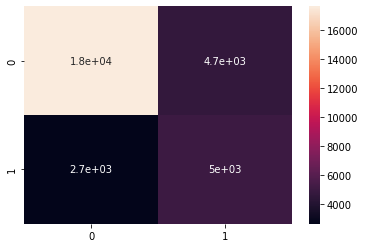

In [ ]:
import seaborn as sns
conf_matrix = confusion_matrix(y_pred, y_valid)
sns.heatmap(conf_matrix, annot=True)

In [ ]:
# 제출 양식 다운로드
submit = pd.read_csv(path + 'sample_submission.csv')

# prediction 수행
df_test = pd.read_csv(path + 'test.csv')

def submit_model(model):
    submit['answer'] = model.predict(df_test.drop(columns=['ID']))
    submit.to_csv(path + 'prediction.csv', index=False)

In [ ]:
submit_model(automl)

In [ ]:
!pip install autosklearn
from autosklearn.classification import AutoSklearnClassifier

ERROR: Could not find a version that satisfies the requirement autosklearn (from versions: none)
ERROR: No matching distribution found for autosklearn


ModuleNotFoundError: No module named 'autosklearn'

In [ ]:
from autosklearn.classification import AutoSklearnClassifier

automl = AutoSklearnClassifier(time_left_for_this_task = 300,
                               tmp_folder = "./log/") 
automl.fit(x_train, y_train)